<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd

import os

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
sat_filepath = '/Users/alex/Desktop/DSI-SF-2-akodate/datasets/state_sat_scores/sat_scores.csv'

sat_scores = pd.read_csv(sat_filepath)

sat_dict = sat_scores.to_dict('list')
print sat_dict

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df_from_dict = pd.DataFrame.from_dict(sat_dict)
df_from_csv = pd.read_csv(sat_filepath)

print df_from_dict.dtypes
print '\n'
print df_from_csv.dtypes

# Reading from a .csv retains column order, reading from a dictionary does not

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object


State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
sat_scores.head(10)

# The data appears to be SAT data listing average verbal and math scores for each state, as well as a "rate"

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
sat_scores_data_dict = []

for col_name, col_dtype in zip(sat_scores.columns.values.tolist(), sat_scores.dtypes):
    sat_scores_data_dict.append({
        'Name':col_name,
        'Type':col_dtype.name
    })
print sat_scores_data_dict

sat_scores_data_dict[0]['Description'] = "US state"
sat_scores_data_dict[1]['Description'] = "Rate"
sat_scores_data_dict[2]['Description'] = "Average verbal score"
sat_scores_data_dict[3]['Description'] = "Average math score"

sat_scores_data_dictionary = {
                            'Columns': sat_scores_data_dict, 
                            'Dataset shape': str(sat_scores.shape[0] - 1) + ' rows, ' + str(sat_scores.shape[1]) + ' columns'
                             }
sat_scores_data_dictionary

[{'Type': 'object', 'Name': 'State'}, {'Type': 'int64', 'Name': 'Rate'}, {'Type': 'int64', 'Name': 'Verbal'}, {'Type': 'int64', 'Name': 'Math'}]


{'Columns': [{'Description': 'US state', 'Name': 'State', 'Type': 'object'},
  {'Description': 'Rate', 'Name': 'Rate', 'Type': 'int64'},
  {'Description': 'Average verbal score', 'Name': 'Verbal', 'Type': 'int64'},
  {'Description': 'Average math score', 'Name': 'Math', 'Type': 'int64'}],
 'Dataset shape': '51 rows, 4 columns'}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

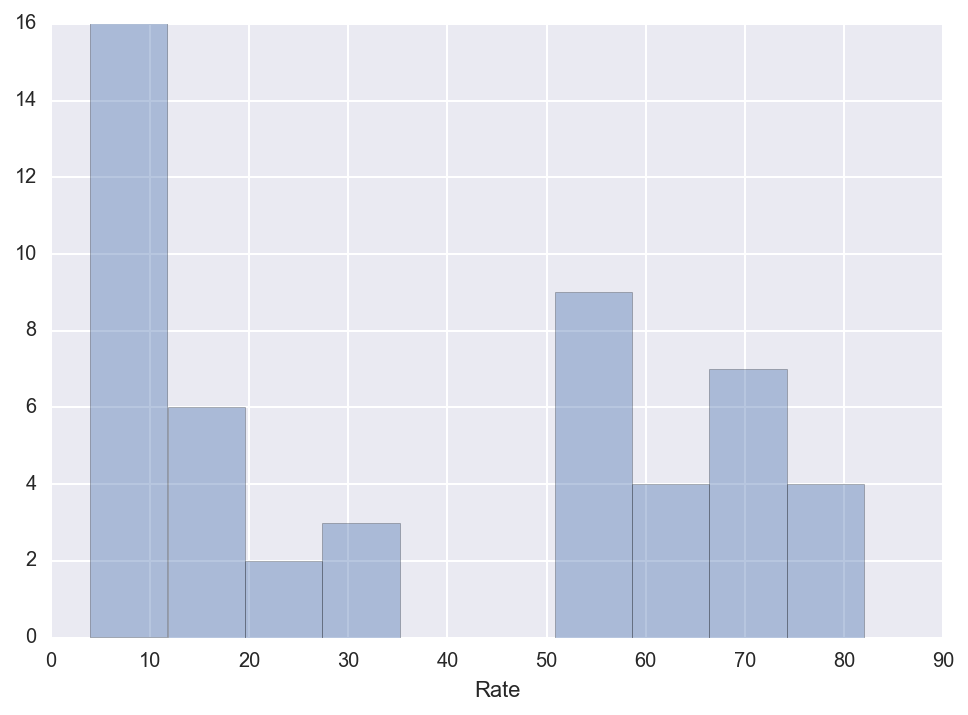

In [6]:
import seaborn as sns

clean_sat_scores = sat_scores[:-1]

sns.distplot(clean_sat_scores['Rate'], bins=10, kde=False)

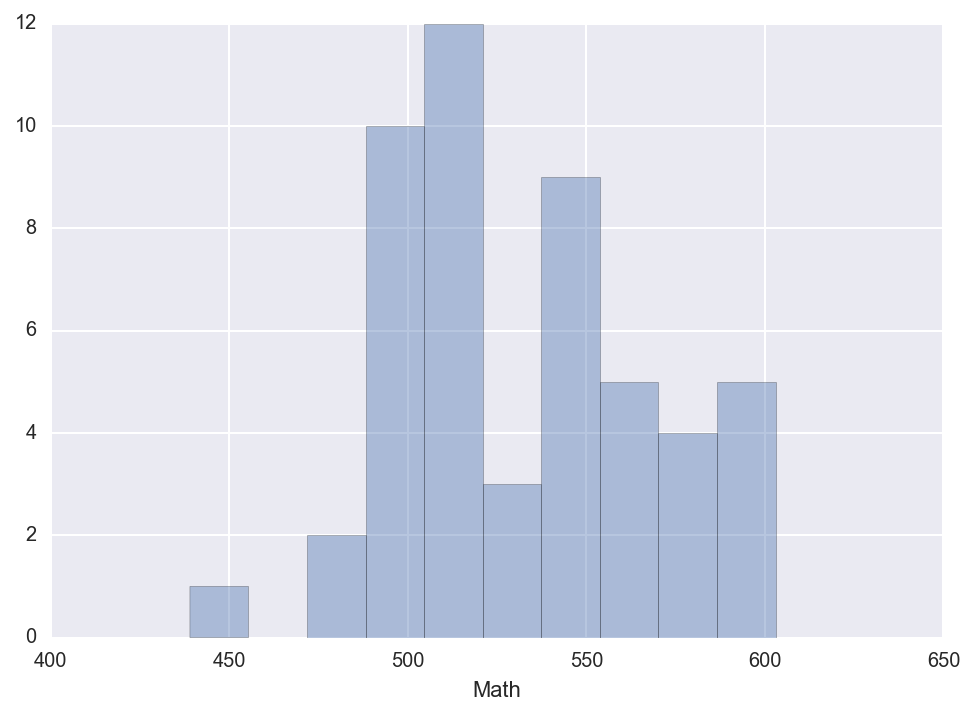

In [7]:
sns.distplot(clean_sat_scores['Math'], bins=10, kde=False)

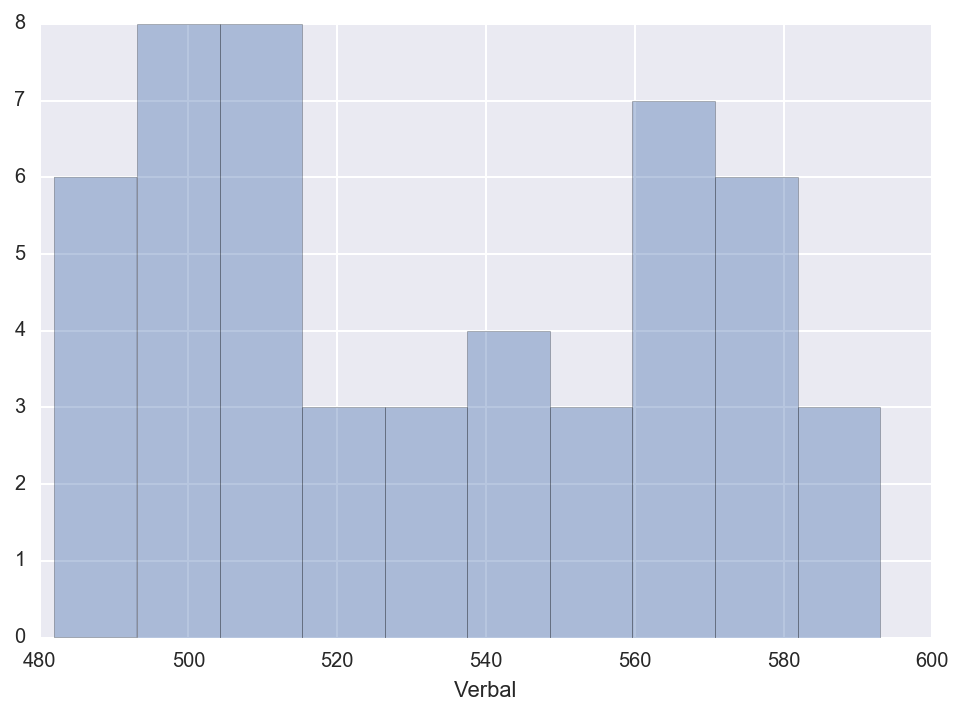

In [8]:
sns.distplot(clean_sat_scores['Verbal'], bins=10, kde=False)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

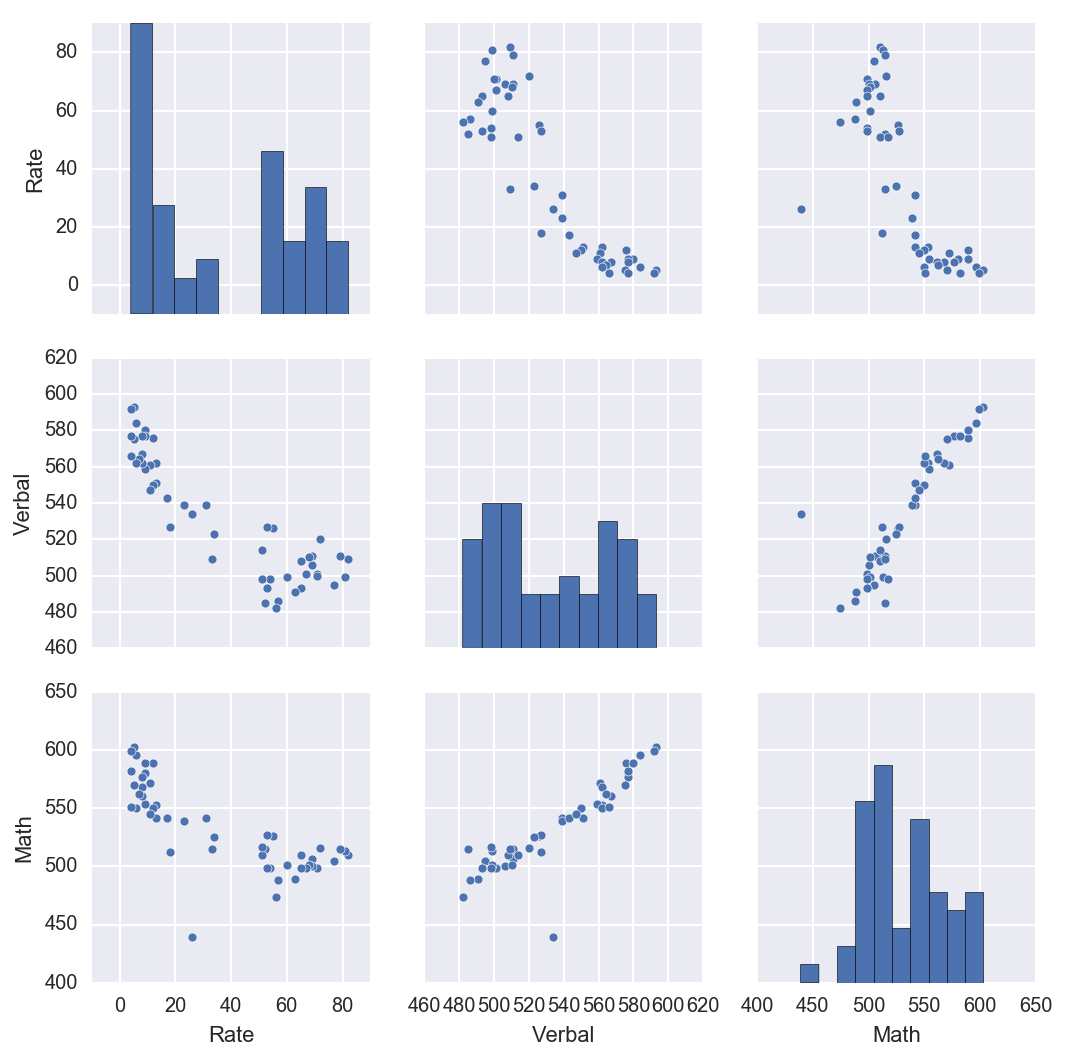

In [9]:
sns.pairplot(clean_sat_scores)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

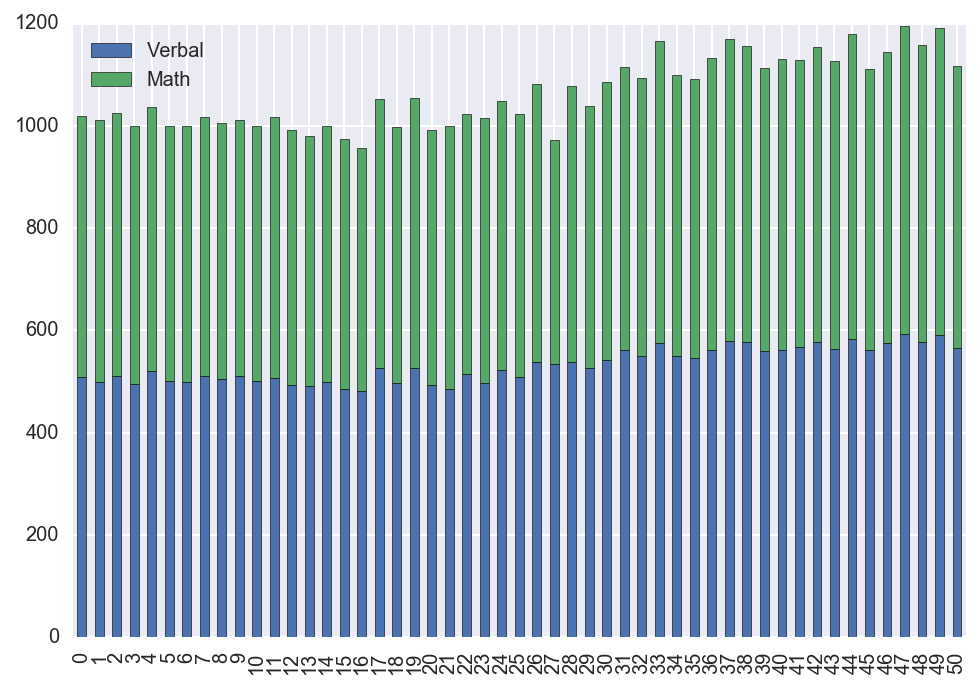

In [10]:
clean_sat_scores[['Verbal', 'Math']].plot.bar(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

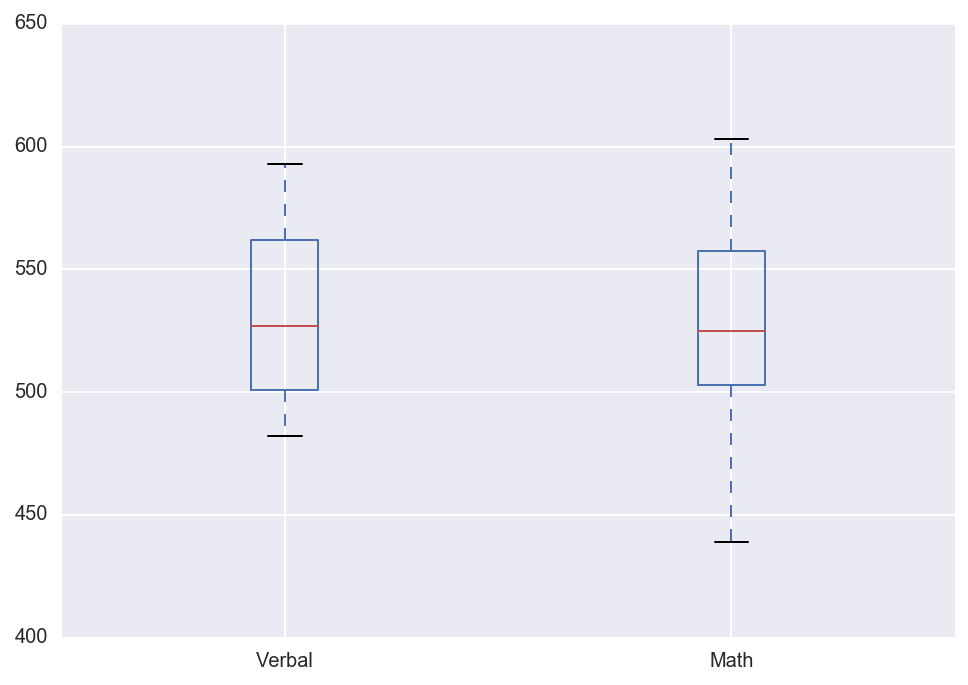

In [11]:
clean_sat_scores[['Verbal', 'Math']].plot.box()

# A boxplot allows you to understand the mean and range at a glance, unlike scatterplots and histograms
# Rate is on a different scale than Math and Verbal, so there are issues with plotting it on the same chart

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


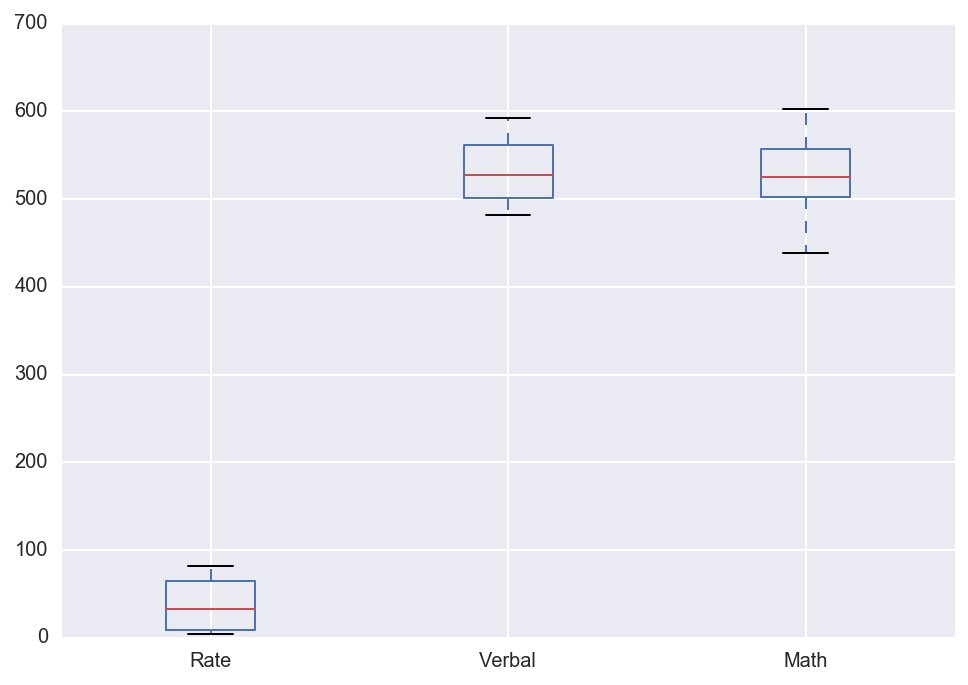

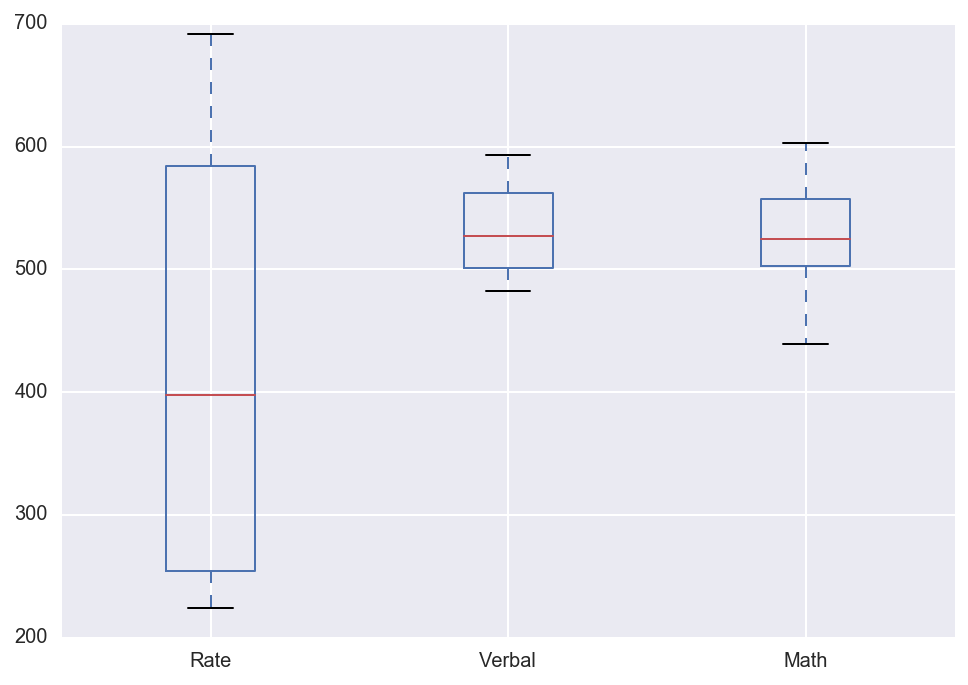

In [12]:
clean_sat_scores.plot.box() 

# Since the rate is a number from 0 to 100, and SAT scores are a number between 200 and 800,
# a rough adjustment can be made by multiplying by 6 and adding 200, giving the same maximum range.

sat_adjusted = clean_sat_scores.copy()
sat_adjusted['Rate'] = clean_sat_scores['Rate'] * 6 + 200
sat_adjusted

sat_adjusted.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [13]:
states_mean = clean_sat_scores['Verbal'].mean()
clean_sat_scores[clean_sat_scores['Verbal'] > states_mean]

# 25 states are above the mean. This suggests that states' average verbal scores have a normal distribution.

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [14]:
states_median = clean_sat_scores['Verbal'].median()

clean_sat_scores[clean_sat_scores['Verbal'] > states_median] == \
clean_sat_scores[clean_sat_scores['Verbal'] > states_mean]

# The two lists are exactly the same. 
# This may be because the states' average verbal scores have a highly normal distribution.

State  Rate Verbal  Math
26  True  True   True  True
27  True  True   True  True
28  True  True   True  True
30  True  True   True  True
31  True  True   True  True
32  True  True   True  True
33  True  True   True  True
34  True  True   True  True
35  True  True   True  True
36  True  True   True  True
37  True  True   True  True
38  True  True   True  True
39  True  True   True  True
40  True  True   True  True
41  True  True   True  True
42  True  True   True  True
43  True  True   True  True
44  True  True   True  True
45  True  True   True  True
46  True  True   True  True
47  True  True   True  True
48  True  True   True  True
49  True  True   True  True
50  True  True   True  True

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [15]:
sat_scores_with_diff = clean_sat_scores.copy()
sat_scores_with_diff['Difference'] = (clean_sat_scores['Verbal'] - clean_sat_scores['Math'])
sat_scores_with_diff.head()

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [16]:
sat_math_diff = sat_scores_with_diff.copy()
sat_verbal_diff = sat_scores_with_diff.copy()

sat_math_diff = sat_math_diff.sort_values('Difference').head(10)
sat_verbal_diff = sat_verbal_diff.sort_values('Difference', ascending=False).head(10)

print sat_math_diff.head(3)
print sat_verbal_diff.head(3)

   State  Rate  Verbal  Math  Difference
21    HI    52     485   515         -30
23    CA    51     498   517         -19
1     NJ    81     499   513         -14
   State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [17]:
clean_sat_scores[['Rate', 'Verbal', 'Math']].corr()

# Verbal and math scores are very strongly correlated.
# However, rate is strongly inversely correlated with both verbal and math scores

Rate    Verbal      Math
Rate    1.000000 -0.888121 -0.773419
Verbal -0.888121  1.000000  0.899909
Math   -0.773419  0.899909  1.000000

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [18]:
clean_sat_scores.describe()

Rate      Verbal        Math
count  51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137
std    27.550681   33.360667   36.287393
min     4.000000  482.000000  439.000000
25%     9.000000  501.000000  503.000000
50%    33.000000  527.000000  525.000000
75%    64.000000  562.000000  557.500000
max    82.000000  593.000000  603.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [19]:
clean_sat_scores.cov()

# 1. The covariance matrix is not restricted to values between -1 and 1, and it generates more extreme values
# 2. Correlation = covariance / (standard deviation of x * standard deviation of y)
# 3. The correlation matrix is preferred because it is normalized and always yields values between -1 and 1

Rate       Verbal         Math
Rate    759.04  -816.280000  -773.220000
Verbal -816.28  1112.934118  1089.404706
Math   -773.22  1089.404706  1316.774902

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [20]:
drug_data_filepath = '/Users/alex/Desktop/DSI-SF-2-akodate/datasets/drug_use_by_age/drug-use-by-age.csv'

raw_drug_data = pd.read_csv(drug_data_filepath)

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [185]:
print raw_drug_data.info()
pd.options.display.max_columns = 28
raw_drug_data.head()

# The dataset seems to describe how much and how often various age groups use various drugs, 
# with the population of the sample for each age group also listed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency  heroin-use heroin-frequency  hallucinogen-use  \
0               -         0.1             35.5               0.2   
1             3.0         0.0                -               0.6   
2               -         0.1              2.0               1.6   
3             9.5         0.2              1.0               2.1   
4             1.0         0.1             66.5               3.4   

   hallucinogen-frequency  inhalant-use inhalant-frequency  pain-releiver-use  \
0                    52.0           1.6               19.0                2.0   
1                     6.0           2.5               12.0                2.4   
2                     3.0           2.6                5.0                3.9   
3                     4.0           2.5                5.5                5.5   
4                     3.0           3.0                3.0                6.2   

   pain-releiver-frequency  oxycontin-use oxycontin-frequency  \
0                     36.0            0.1                24.5   
1                     14.0            0.1                41.0   
2                     12.0            0.4                 4.5   
3                     10.0            0.8                 3.0   
4                      7.0            1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

   stimulant-frequency  meth-use meth-frequency  sedative-use  \
0                  2.0       0.0              -           0.2   
1                  4.0       0.1            5.0           0.1   
2                 12.0       0.1           24.0           0.2   
3                  6.0       0.3           10.5           0.4   
4                  9.5       0.3           36.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [22]:
# Question: does drug usage peak among people in their 20s?
# (Rates only, frequency excluded)

# Deliverables: I will deliver the answer to my question, along with supporting data.

In [171]:
drugs = raw_drug_data.copy()

# Convert all columns except for 'age' to numbers
def numerizer(cell):
    if cell == '-': return 0
    else: return pd.to_numeric(cell)
    
drugs.iloc[:, 1:] = drugs.iloc[:, 1:].applymap(numerizer)

# drugs.head()

In [193]:
# drugs.describe()

In [190]:
drug_rates = drugs.copy()

# Create a new DataFrame without drug frequency columns
drug_rates = drug_rates.drop(drug_rates.iloc[:, 3::2], axis=1)

In [197]:
# Create new column with the mean of all drug usage rates for each age group
drug_rates['overall_mean'] = drug_rates.iloc[:, 2:].apply(np.mean, axis=1)
drug_rates.head()

age     n  alcohol-use  marijuana-use  cocaine-use  crack-use  heroin-use  \
0  12  2798          3.9            1.1          0.1        0.0         0.1   
1  13  2757          8.5            3.4          0.1        0.0         0.0   
2  14  2792         18.1            8.7          0.1        0.0         0.1   
3  15  2956         29.2           14.5          0.5        0.1         0.2   
4  16  3058         40.1           22.5          1.0        0.0         0.1   

   hallucinogen-use  inhalant-use  pain-releiver-use  oxycontin-use  \
0               0.2           1.6                2.0            0.1   
1               0.6           2.5                2.4            0.1   
2               1.6           2.6                3.9            0.4   
3               2.1           2.5                5.5            0.8   
4               3.4           3.0                6.2            1.1   

   tranquilizer-use  stimulant-use  meth-use  sedative-use  overall_mean  
0               0.2            0.2       0.0           0.2      0.746154  
1               0.3            0.3       0.1           0.1      1.415385  
2               0.9            0.8       0.1           0.2      2.884615  
3               2.0            1.5       0.3           0.4      4.584615  
4               2.4            1.8       0.3           0.2      6.315385

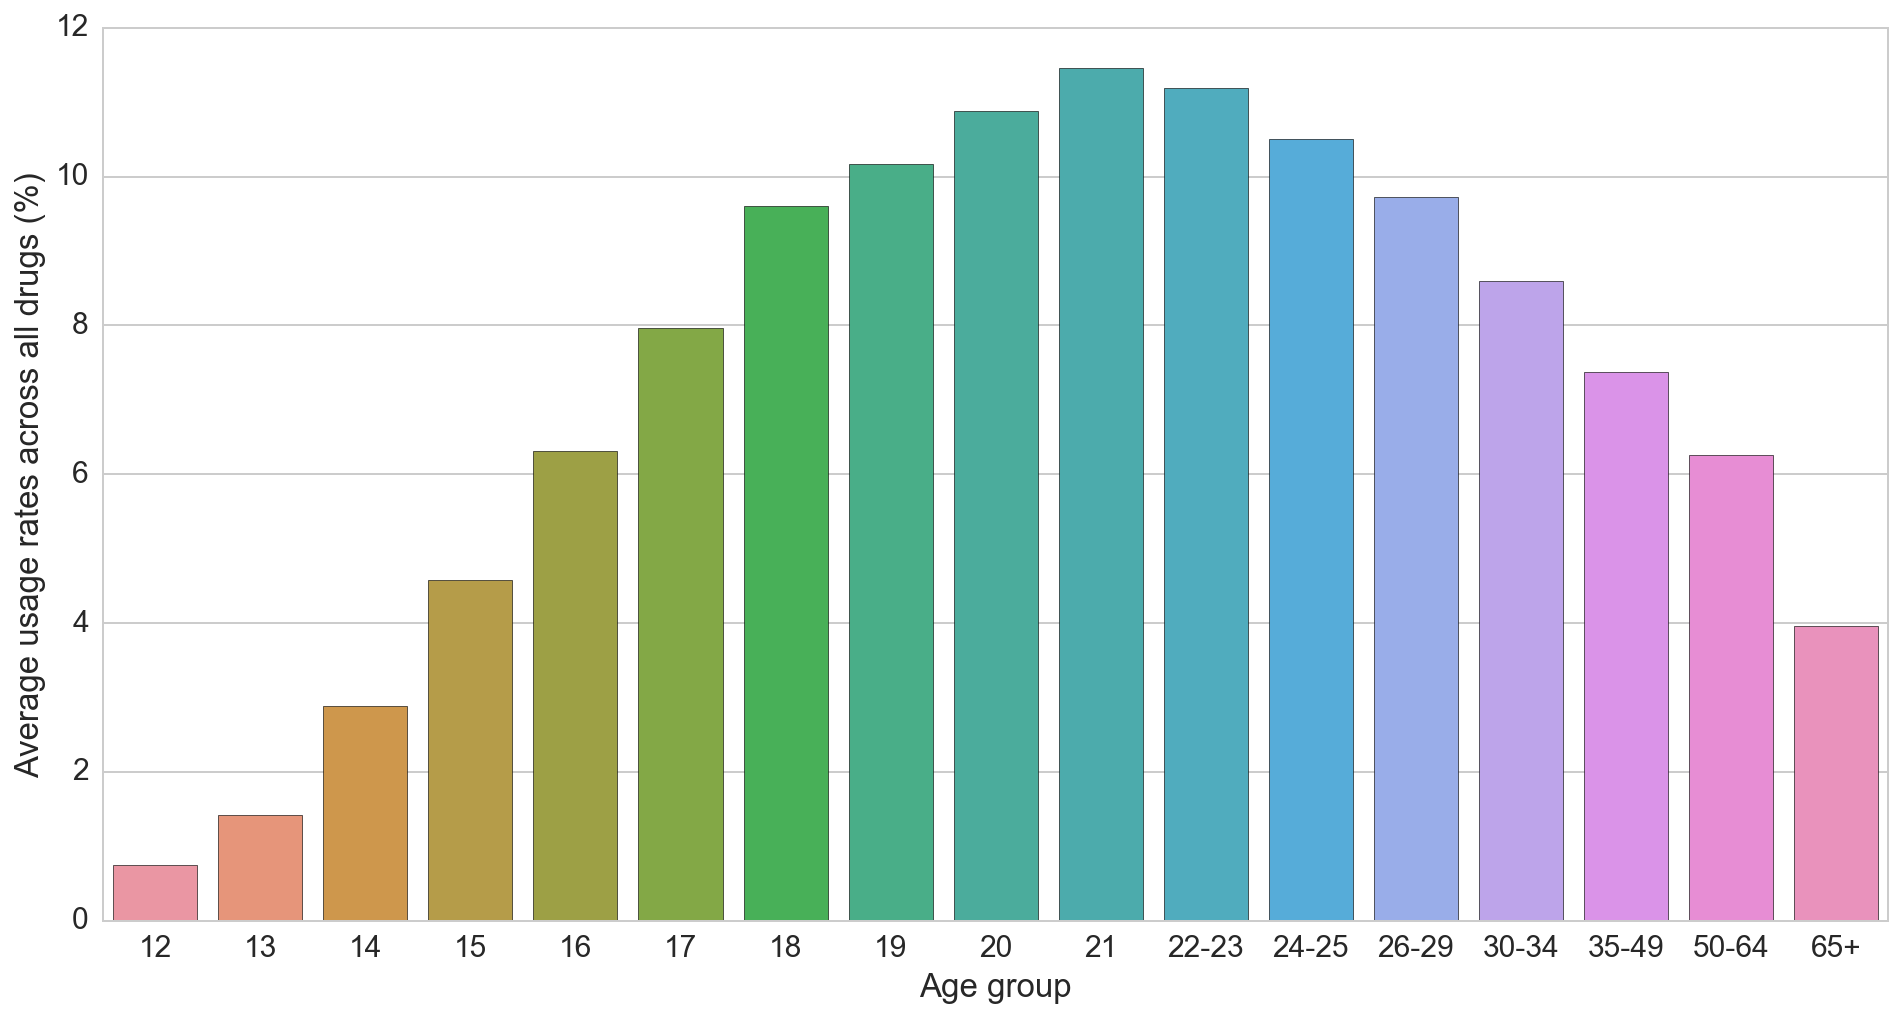

In [196]:
import matplotlib.pyplot as plt

sns.set(font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

ax = sns.barplot(x = drug_rates['age'], y = drug_rates['overall_mean'])
ax.set(xlabel='Age group', ylabel='Average usage rates across all drugs (%)')

plt.show()

In [ ]:
# Assuming the sample is representative of the population, it can be seen that overall drug usage rates peak among
# people in their 20's (more specifically, around age 21).

# The hypothesis was correct. (As mentioned before, only the rate is considered, not frequency)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

In [24]:
clean_sat_scores.cov()

# 2. The covariance matrix is not restricted to values between -1 and 1, and it generates more extreme values
# 3. The correlation matrix is preferred because it is normalized and always yields values between -1 and 1

Rate       Verbal         Math
Rate    759.04  -816.280000  -773.220000
Verbal -816.28  1112.934118  1089.404706
Math   -773.22  1089.404706  1316.774902

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



In [25]:
# 1. Covariance = (sum of the products of all elements in list x and their counterparts in list y) / (sample size - 1)
#    The covariance of each pair of sets yields a covariance matrix.

# 2. Correlation = covariance / (standard deviation of x * standard deviation of y)
#    The correlation of each pair of sets yields a correlation matrix.

# 3. The primary difference is that correlation is normalized

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [215]:
clean_sat_scores["Rate"].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

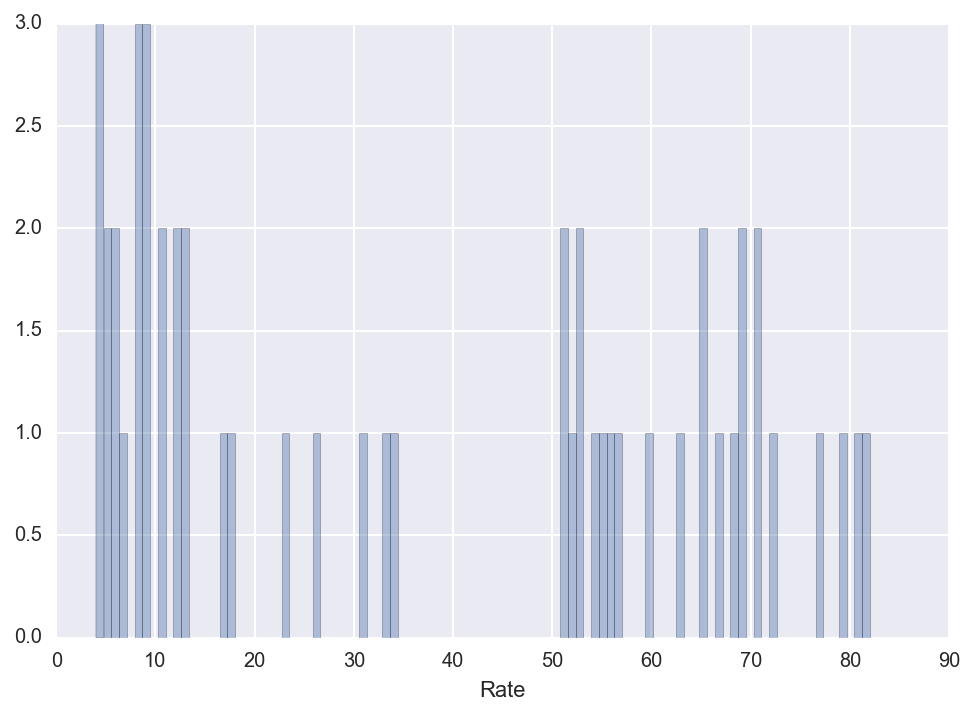

In [214]:
sns.set()
sns.distplot(clean_sat_scores["Rate"], bins=100, kde=False)

In [ ]:
# Not going to try to get into outliers at this stage — for data like this it seems especially subjective.

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [222]:
stats.spearmanr(clean_sat_scores['Verbal'], clean_sat_scores['Math'])[0]

0.9094125143903472

In [ ]:
# 1. The Pearson correlation method is good at assessing whether 2 sets have a linear relationship.
#    The Spearman correlation method is good at assessing whether 2 sets have a "monotonic" relationship.

#    "In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate."
#    (Source: http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/)



# 2. Step 1: Get the set length (n)
#    Step 2: Rank each element of data for both sets of data.
#    Step 3: Square the difference between the ranks for each data pair to get d^2
#    Step 4: Take (6 x d^2) / n(n^2 - 1) and subtract it from 1

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [272]:
sat_stats = clean_sat_scores.copy()

sat_stats['Percentile'] = sat_stats.apply(lambda row: stats.percentileofscore(sat_stats['Rate'], row[1]), axis=1)

print sat_stats[sat_stats['State'] == 'CA']

# The Spearman Rank Correlation equation factors rank in, and rank can also be expressed with a percentile score.

   State  Rate  Verbal  Math  Percentile
23    CA    51     498   517   55.882353


### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

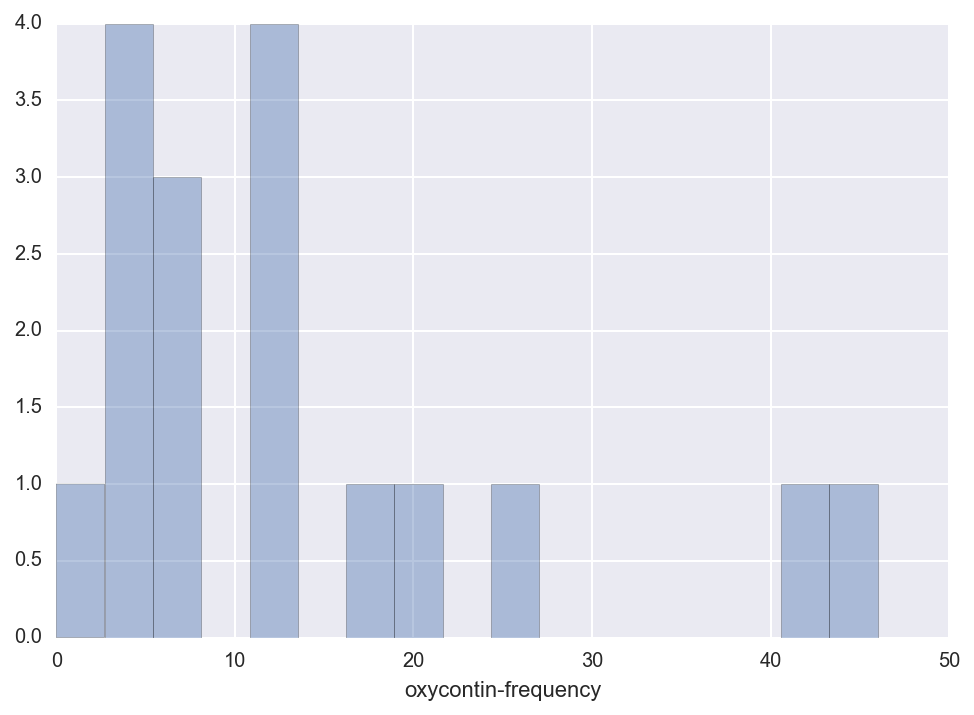

In [295]:
# 1. Percentiles could be used as cutoffs for eliminating outliers; values above ~99.87 percentile are over 3
#    standard deviations away from the mean.

sns.distplot(drugs['oxycontin-frequency'], bins=17, kde=False)

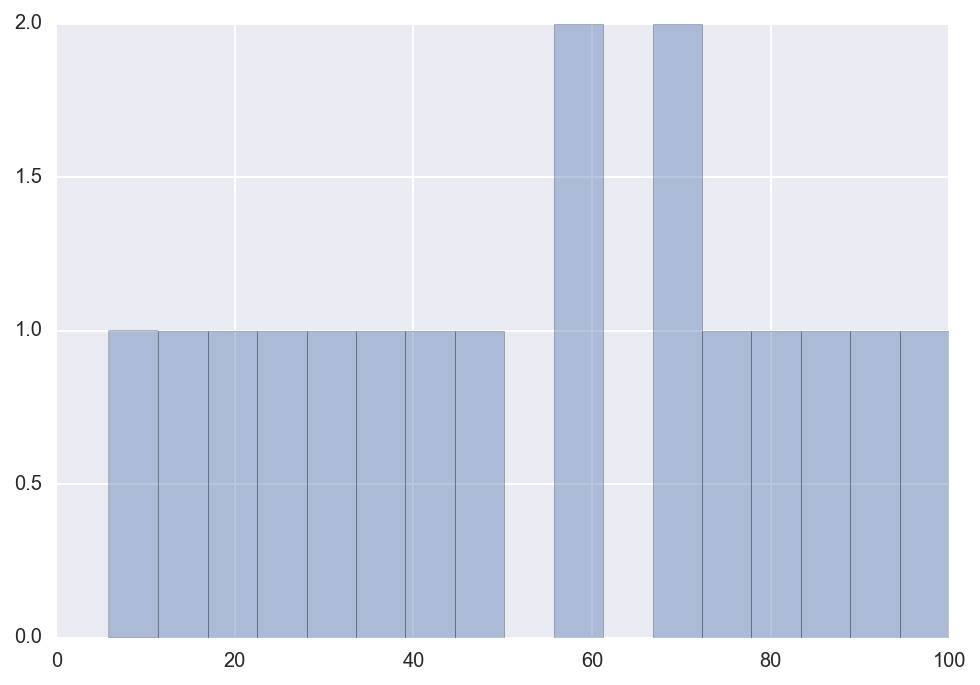

In [302]:
sns.distplot([stats.percentileofscore(drugs['oxycontin-frequency'], x) for x in drugs['oxycontin-frequency']], bins=17, kde=False)

In [303]:
# Plotting scores converted into percentiles results in a flat plot — a completely even distribution — except 
# where values are the same (because that puts them in the exact same percentile). Does not apply to bivariate plots.